In [5]:
import numpy
import numpy as np
import imageio.v2 as imageio
from matplotlib import pyplot as plt

# 1. Gaussian process regression


In [11]:
img = imageio.imread("cc_90.png")
img = img.flatten()

print(img.shape)
img

(84500,)


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
def kernel_sim(X, gamma, h):

    def gaussian_kernel(data, sigma, gamma, max_distance):
    """Compute the gaussian kernel matrix.
    :param data: data matrix
    :param sigma: parameter sigma of the gaussian kernel
    :return: gaussian kernel matrix
    """
    assert len(data.shape) == 2
    assert sigma > 0

    # d = np.exp(-.5 * np.power(np.sum(((data - k) / sigma) ** 2, axis=1), gamma / 2))
    # Find the pairwise squared distances and compute the Gaussian kernel.
    K = []
    for k in X:
        limit = np.exp(-(np.sqrt(np.abs()**2 / h**2)) **gamma)
    d[d < limit] = 0.0 # truncate the Gaussian
    d = scipy.sparse.csc_matrix(d[:, None])
    K.append(d)
    K = scipy.sparse.hsta

# 2. Fitting circles

## 2.1 RANSAC

In [11]:
data = np.load("circles.npy")

print(f"data.shape: {data.shape}\n")
data

data.shape: (2431, 2)



array([[0.64454115, 0.51206203],
       [0.36365302, 0.59665355],
       [0.04661327, 0.46081054],
       ...,
       [0.1193191 , 0.00496104],
       [0.54284675, 0.50105   ],
       [0.66827075, 0.16495374]])

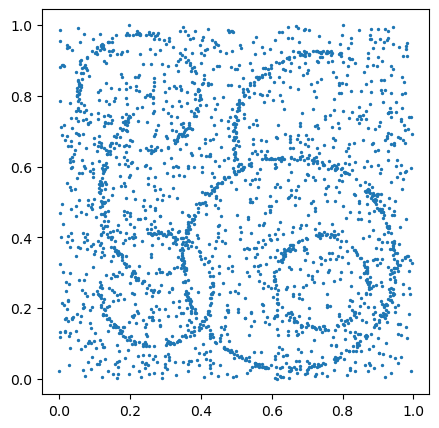

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(data[:,0], data[:,1], s=2)
plt.axis("equal")
plt.show()

### I would fit 6 circles/circle segments as a human

In [176]:
import math

def calculate_circumcircle(point1, point2, point3):
    x1, y1 = point1
    x2, y2 = point2
    x3, y3 = point3

    d = 2 * (x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))
    center_x = ((x1**2 + y1**2) * (y2 - y3) + (x2**2 + y2**2) * (y3 - y1) + (x3**2 + y3**2) * (y1 - y2)) / d
    center_y = ((x1**2 + y1**2) * (x3 - x2) + (x2**2 + y2**2) * (x1 - x3) + (x3**2 + y3**2) * (x2 - x1)) / d

    radius = math.sqrt((center_x - x1)**2 + (center_y - y1)**2)

    return np.array([center_x, center_y]), radius

def inside_threshold(X, center, radius, eps):

    isinside = np.zeros(X.shape[0])

    # Epsilon-dependent threshold hyperparameter
    thresh = radius + eps

    for idx, point in enumerate(X):

        dist_orig = np.sqrt(np.sum((point - center)**2))
        isinside_ = dist_orig < thresh

        isinside[idx] = isinside_

    return isinside

def ransac(X, eps, alpha, plot=True):

    circles = []
    included_idxs = np.arange(X.shape[0], dtype=int)

    while True:
        # Iteration over circles

        circle_data = X[included_idxs]
        # print(included_idxs.shape[0])
        # print(circle_data.shape[0])

        best_circle = [None, None, np.zeros(X.shape[1], dtype=bool)] # Center, radius, points in data considered inside

        T_count = 0
        T = None

        while True:
            # Iteration over T

            # 3 Random points
            rp = np.random.uniform(low=0, high=1, size=(3,2))
            # print(rp)

            # Circumcircle
            center, radius = calculate_circumcircle(*rp)
            # print("center", center)
            # print("radius", radius)

            # Classify points
            inside_thresh = inside_threshold(circle_data, center, radius, eps)
            # print(circle_data[0:5])
            # print(inside_thresh[0:5])

            # Update stats
            if np.sum(inside_thresh) > np.sum(best_circle[2]):
                best_circle = [center, radius, inside_thresh]

            # Define T
            if T_count == 0:

                gamma = np.sum(inside_thresh) / included_idxs.shape[0]
                num = np.log(1 - alpha)
                denom = (np.log(1 - gamma**3))

                # Manual gate
                if denom <= 0:
                    denom == -0.2

                T = num // denom

                # Manual gate
                if T in [float("inf"), float("-inf")] or T > 100:
                    T = 100

                # print("T: ", T)

            if T_count == T:
                break

            T_count += 1

        circles.append(best_circle)
        # print(np.sum(best_circle[2]))
        # print(np.sum(np.logical_not(best_circle[2])))
        # print(included_idxs.shape)
        # print(np.logical_not(best_circle[2]).shape)
        included_idxs = included_idxs[np.logical_not(best_circle[2])]

        if included_idxs.shape[0] <= 0:
            break

        # print("---")

    if plot:

        plt.figure(figsize=(5,5))
        plt.scatter(X[:,0], data[:,1], s=2)
        plt.axis("equal")

        for circle in circles:

            circle = plt.Circle(circle[0], radius=circle[1], fill=False)
            plt.gca().add_patch(circle)

        plt.show()

=========== eps: 0.0 ===========


/tmp/ipykernel_12703/3577381524.py:81: RuntimeWarning: divide by zero encountered in scalar floor_divide
  T = num // denom


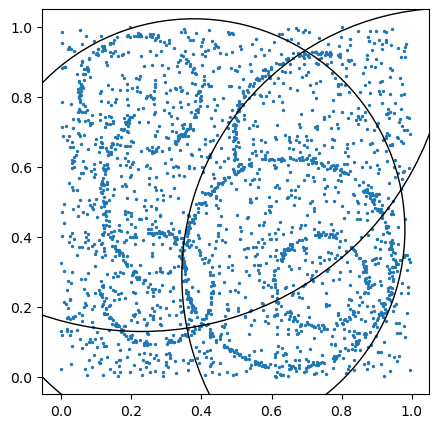

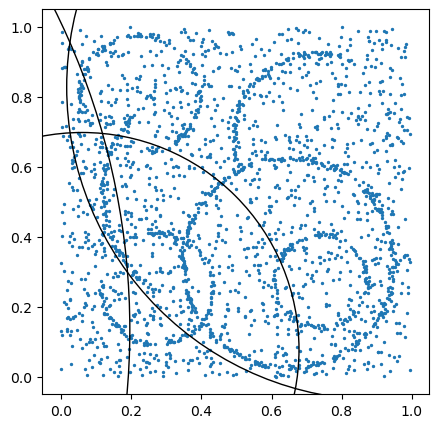

=========== eps: 0.05 ===========


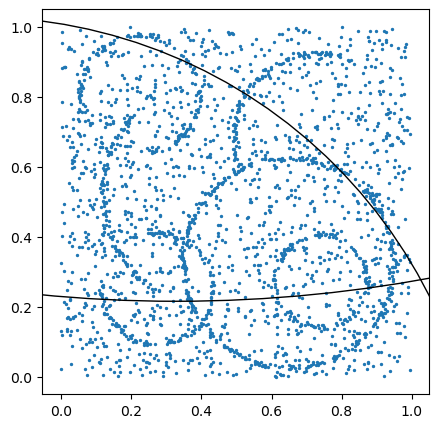

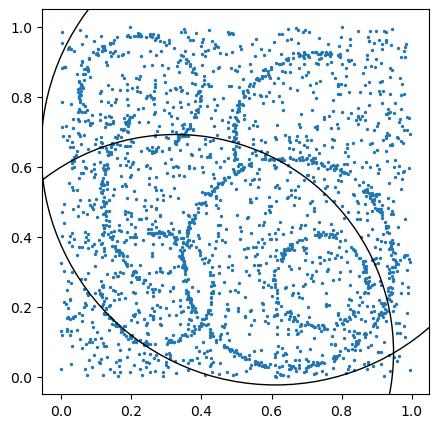

=========== eps: 0.1 ===========


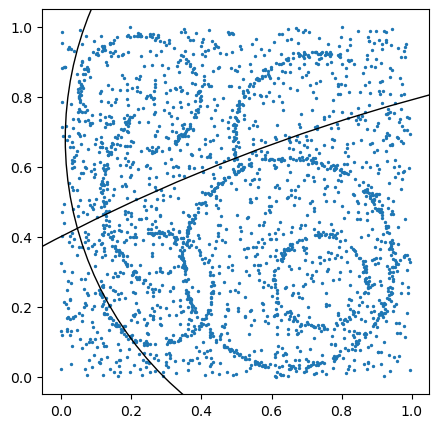

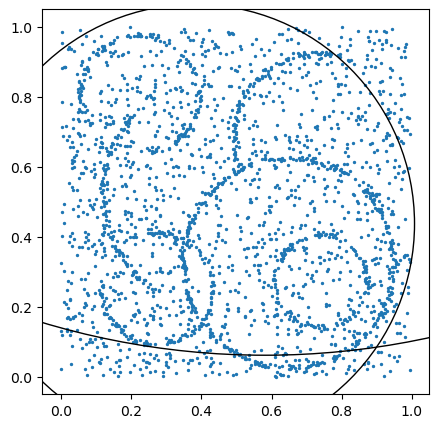

=========== eps: 0.15000000000000002 ===========


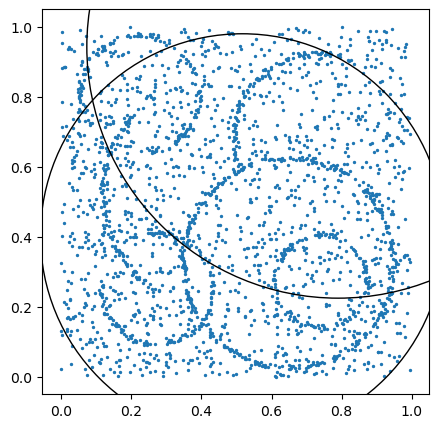

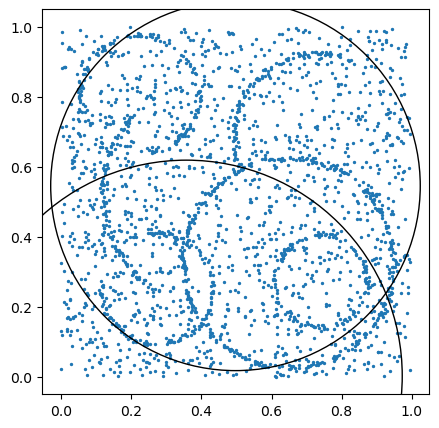

=========== eps: 0.2 ===========


/tmp/ipykernel_12703/3577381524.py:75: RuntimeWarning: divide by zero encountered in log
  denom = (np.log(1 - gamma**3))


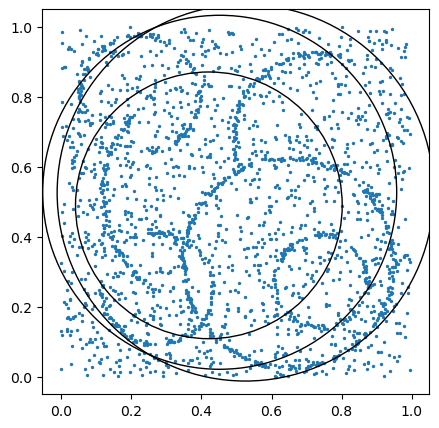

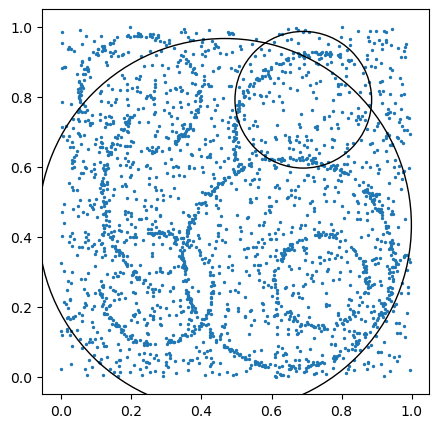

=========== eps: 0.25 ===========


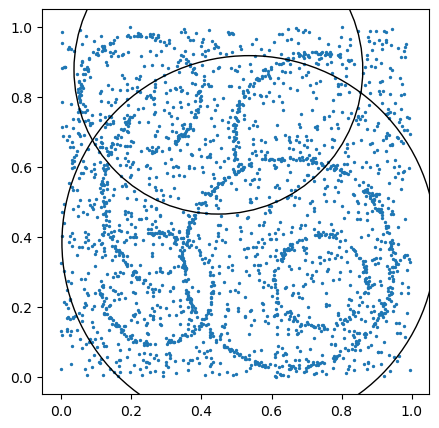

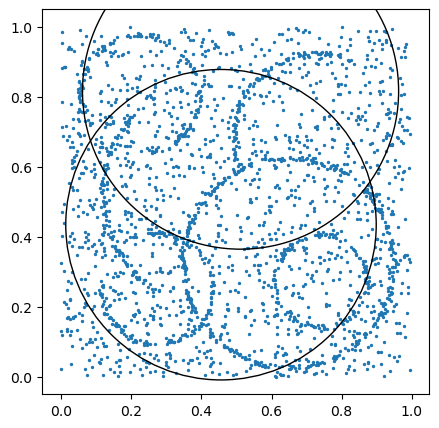

=========== eps: 0.30000000000000004 ===========


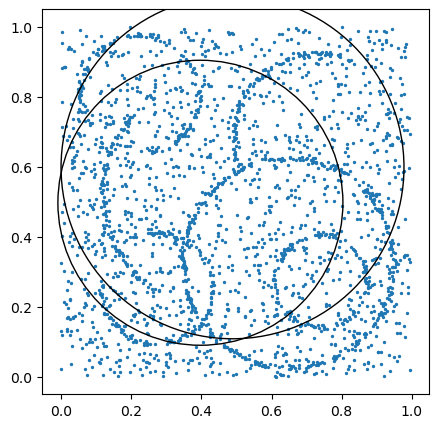

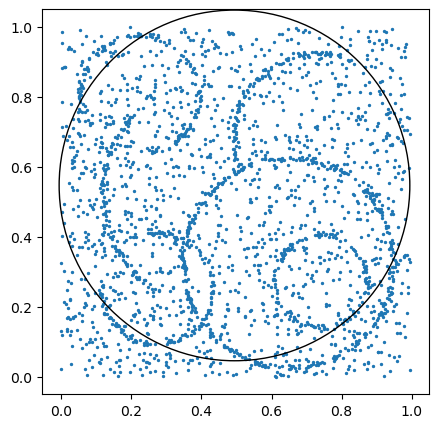

In [178]:
for eps in np.arange(0, 0.35, 0.05):

    print(f"=========== eps: {eps} ===========")

    ransac(data, eps=eps, alpha=alpha, plot=True)
    ransac(data, eps=eps, alpha=alpha, plot=True)

### We don't see a specific benefit of varying the epsilon hyperparameter. Maybe generating the three random points from a normal distribution would be more adequate?